In [22]:
#Импортирование необходим библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Смотрим на тренировочные данные данные
df_train = pd.read_csv("titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df_train.shape[0]

891

In [25]:
#Смотрим на тестовые данные данные
df_test = pd.read_csv("titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [28]:
df_train.set_index("PassengerId", inplace=True)
df_test.set_index("PassengerId", inplace=True)

In [29]:
train_index, test_index = list(df_train.index - 1), list(df_test.index - 1)

In [30]:
full_df = pd.concat([df_train, df_test], axis=0)

In [31]:
full_df.drop_duplicates(inplace=True)

In [32]:
full_df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Посмотрим, сколько людей выжило, а сколько людей погибло

Выживших людей 342
Погибших людей 549


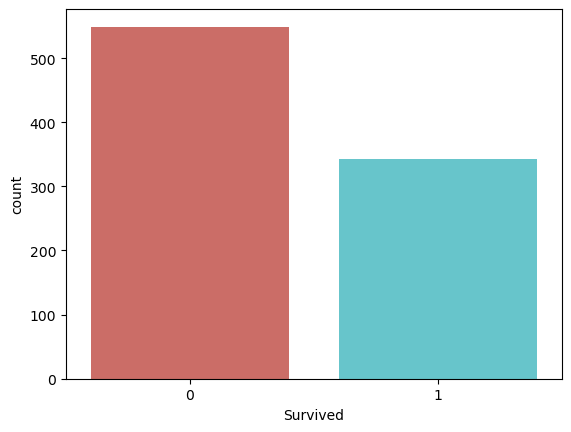

In [33]:
print(f"Выживших людей {len(df_train[df_train["Survived"] == 1])}", f"Погибших людей {len(df_train[df_train["Survived"] == 0])}", sep="\n")
sns.countplot(data=df_train, x="Survived", palette="hls")
plt.show()

In [34]:
full_df["Sex"] = full_df["Sex"].apply(lambda x: 1 if x=="male" else 0)

In [35]:
full_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [36]:
full_df.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Cabin        186
Embarked       3
dtype: int64

### Поделим колонки на 2 категории
- Вещестевенные
- Категориальные

In [37]:
#Разобьем колонки
df_num_columns = full_df[["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Survived"]]
df_cat_columns = full_df[["Name", "Ticket", "Cabin", "Embarked", "Survived"]]

In [38]:
#Посмотрим среднее для выживаемости
df_num_columns.groupby("Survived").mean()

,Age,Fare,Pclass,Sex,SibSp,Parch
Survived,,,,,,
0.0,30.626179,22.117887,2.531876,0.852459,0.553734,0.329690
1.0,28.343690,48.395408,1.950292,0.318713,0.473684,0.464912


In [39]:
#Пропуски
df_num_columns.isna().sum()

Age         263
Fare          1
Pclass        0
Sex           0
SibSp         0
Parch         0
Survived    418
dtype: int64

In [40]:
df_num_columns["Fare"].fillna(df_num_columns["Fare"].mean(), inplace=True)

In [41]:
#Пропуски
df_num_columns.isna().sum()

Age         263
Fare          0
Pclass        0
Sex           0
SibSp         0
Parch         0
Survived    418
dtype: int64

In [42]:
df_num_columns.groupby(df_num_columns["Age"].isnull()).mean()

,Age,Fare,Pclass,Sex,SibSp,Parch,Survived
Age,,,,,,,
False,29.881138,36.682839,2.207457,0.629063,0.502868,0.420650,0.406162
True,NaN,19.823319,2.642586,0.703422,0.482890,0.243346,0.293785


Видно, что у людей у которых отсутствует возраст, более дешевые билеты и меньше выживаемость

### Посмотрим зависимость возраста и цены на билет на выживаемость

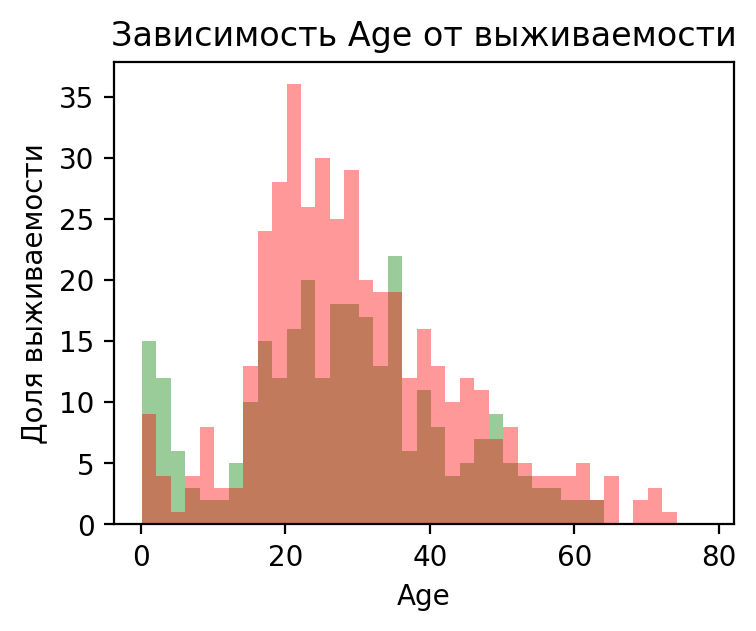

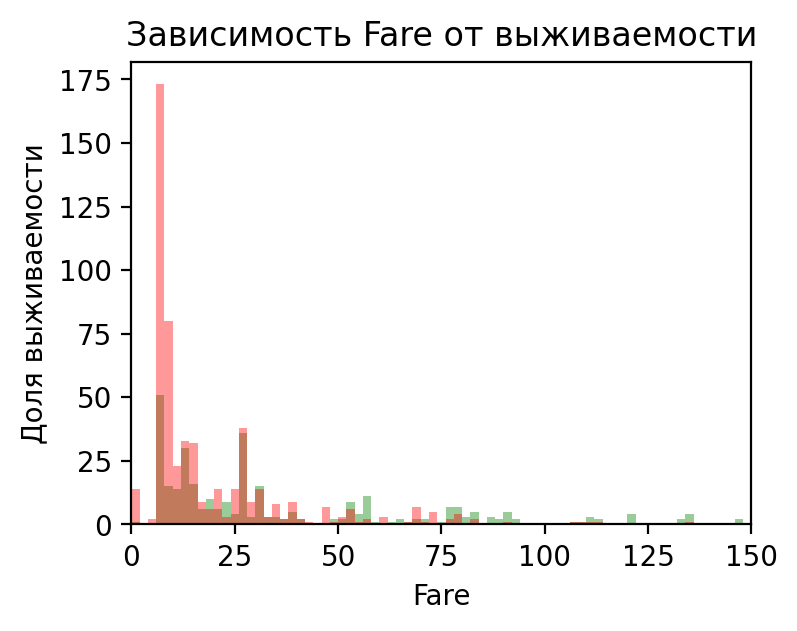

In [43]:
for col in ["Age", "Fare"]:
    fig = plt.figure(figsize=(4, 3), dpi=200)
    min_value, max_value = min(df_num_columns[col]), max(df_num_columns[col])
    plt.title(f"Зависимость {col} от выживаемости")
    sns.distplot(a=df_num_columns[df_num_columns["Survived"] == 1][col], bins=np.arange(min_value, max_value, 2), color="green", kde=False)
    sns.distplot(a=df_num_columns[df_num_columns["Survived"] == 0][col], bins=np.arange(min_value, max_value, 2), color="red", kde=False)
    plt.ylabel("Доля выживаемости")
    if col == "Fare":
        plt.xlim(0, 150)
    plt.show()
#Видно, что выживали более молодые

### Посмотрим, как различные категории влияют на распределение целевой переменной

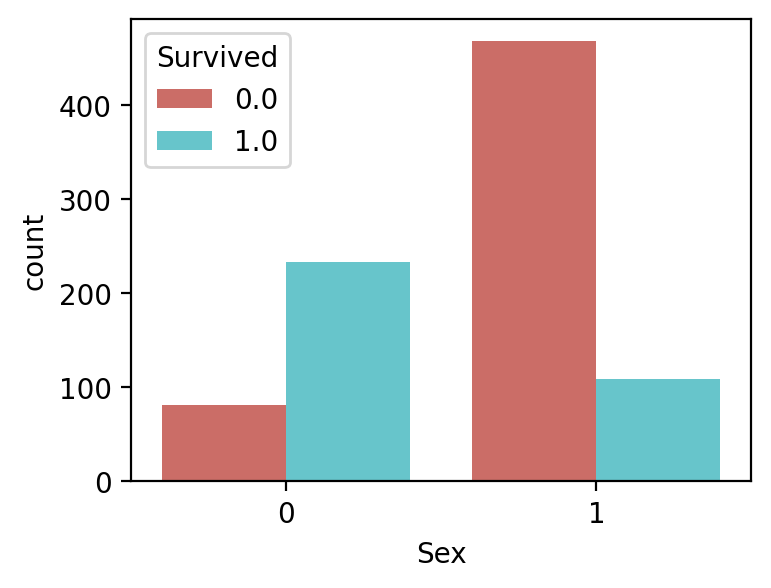

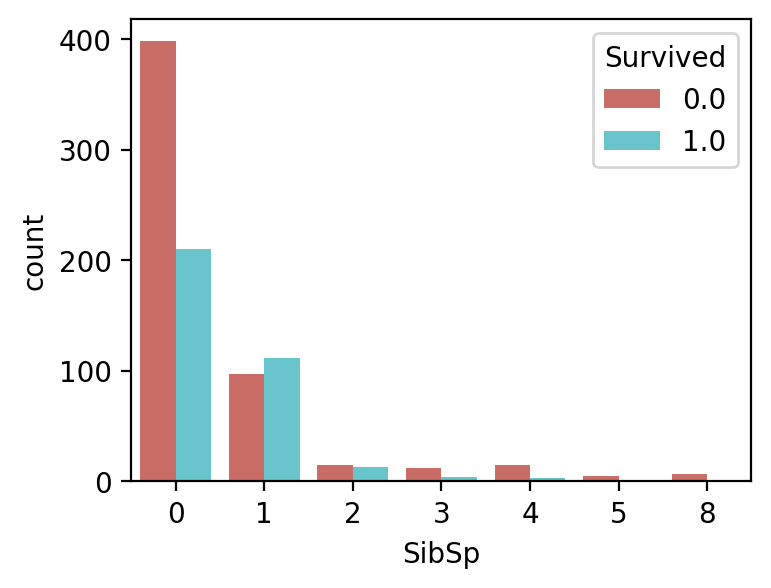

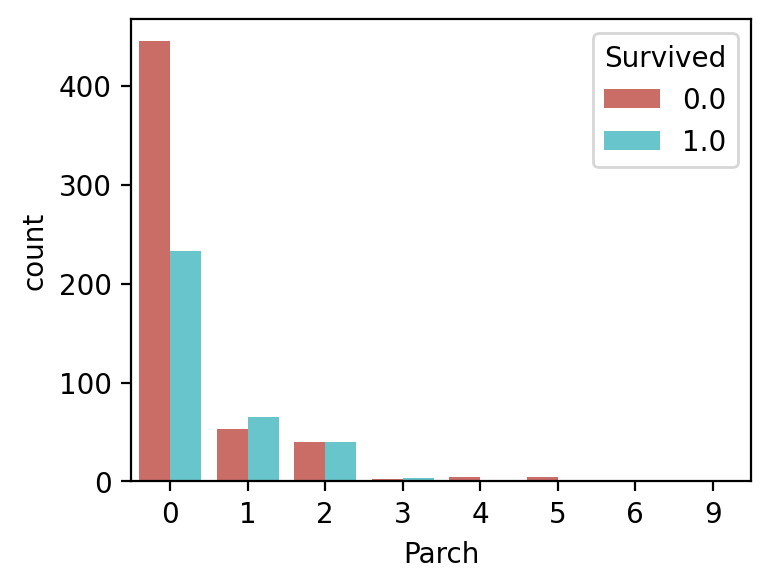

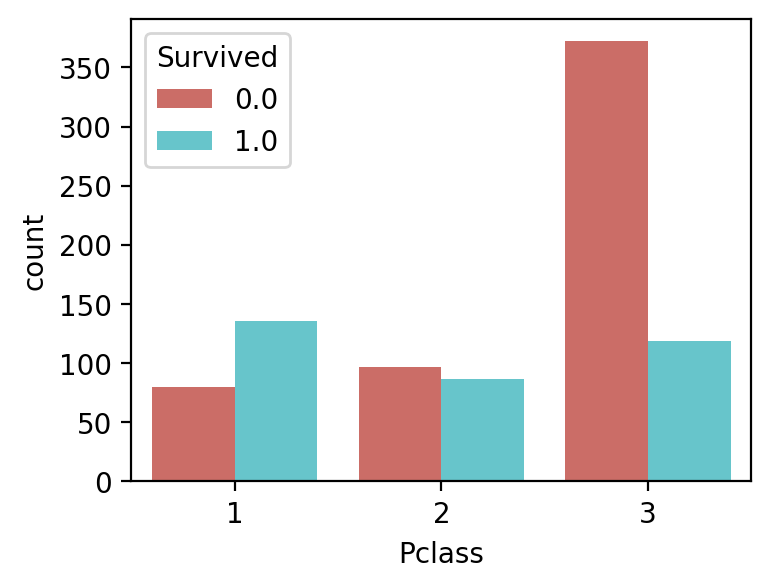

In [44]:
for col in ["Sex", "SibSp", "Parch", "Pclass"]:
    fig = plt.figure(figsize=(4, 3), dpi=200)
    sns.countplot(data=df_num_columns, x=col, hue="Survived", palette="hls")
    plt.show()

### Результат
Видно, что больше выживало женщин и людей с высоким уровнем класса в билеты.
В документации говорилось, что шлюпок на всех не хватило, тогда стоит полагать, что шлюпки подавались людям высокого класса.
Видно из графиков, что женщин выживало больше, но за с чёт чего выживали женщины, из-за благородства мужчин или же все таки из-за высокого класса?

In [45]:
df_num_columns.groupby("Sex").mean()
#Видно, что в основном билет у женщин дороже, чем у мужчин
#Также женщины в основном ездили с семьей, скорее всего это и приводило к высокой выживаемости

,Age,Fare,Pclass,SibSp,Parch,Survived
Sex,,,,,,
0,28.687088,46.198097,2.154506,0.652361,0.633047,0.742038
1,30.585228,26.163072,2.372479,0.413998,0.247924,0.188908


### Заполнение пропусков в колонке Age
Для заполнения пропусков в колонке Age будем использовать KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
X, y = df_num_columns[~df_num_columns["Age"].isnull()][["Fare", "Pclass", "Sex", "SibSp", "Parch"]], df_num_columns[~df_num_columns["Age"].isnull()]["Age"]
model.fit(X, y)

predict = model.predict(df_num_columns.drop(["Age", "Survived"], axis=1))

In [47]:
df_num_columns["Age"].fillna(pd.Series(predict), inplace=True)

In [48]:
df_num_columns[df_num_columns["Age"].isnull()]

,Age,Fare,Pclass,Sex,SibSp,Parch,Survived
PassengerId,,,,,,,
1309,NaN,22.3583,3,1,1,1,NaN


In [49]:
df_num_columns["Age"].fillna(df_num_columns["Age"].median(), inplace=True)

In [50]:
df_num_columns.isna().sum()

Age           0
Fare          0
Pclass        0
Sex           0
SibSp         0
Parch         0
Survived    418
dtype: int64

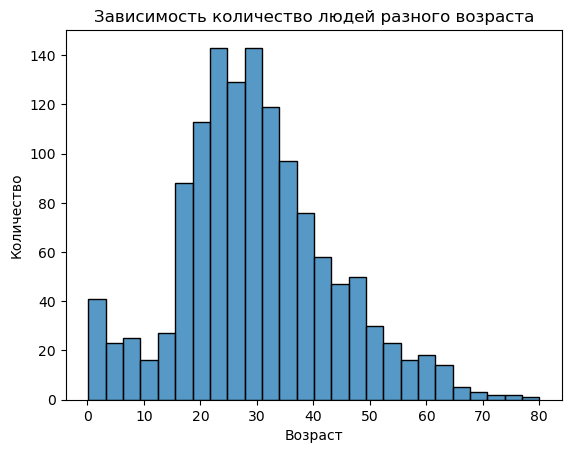

In [51]:
sns.histplot(data=df_num_columns, x="Age")
plt.title("Зависимость количество людей разного возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()
#Видно, что в основном распредление не изменилось, лучше, если бы заполение было бы через медиану

<Axes: title={'center': 'Тепловая карта корреляции'}>

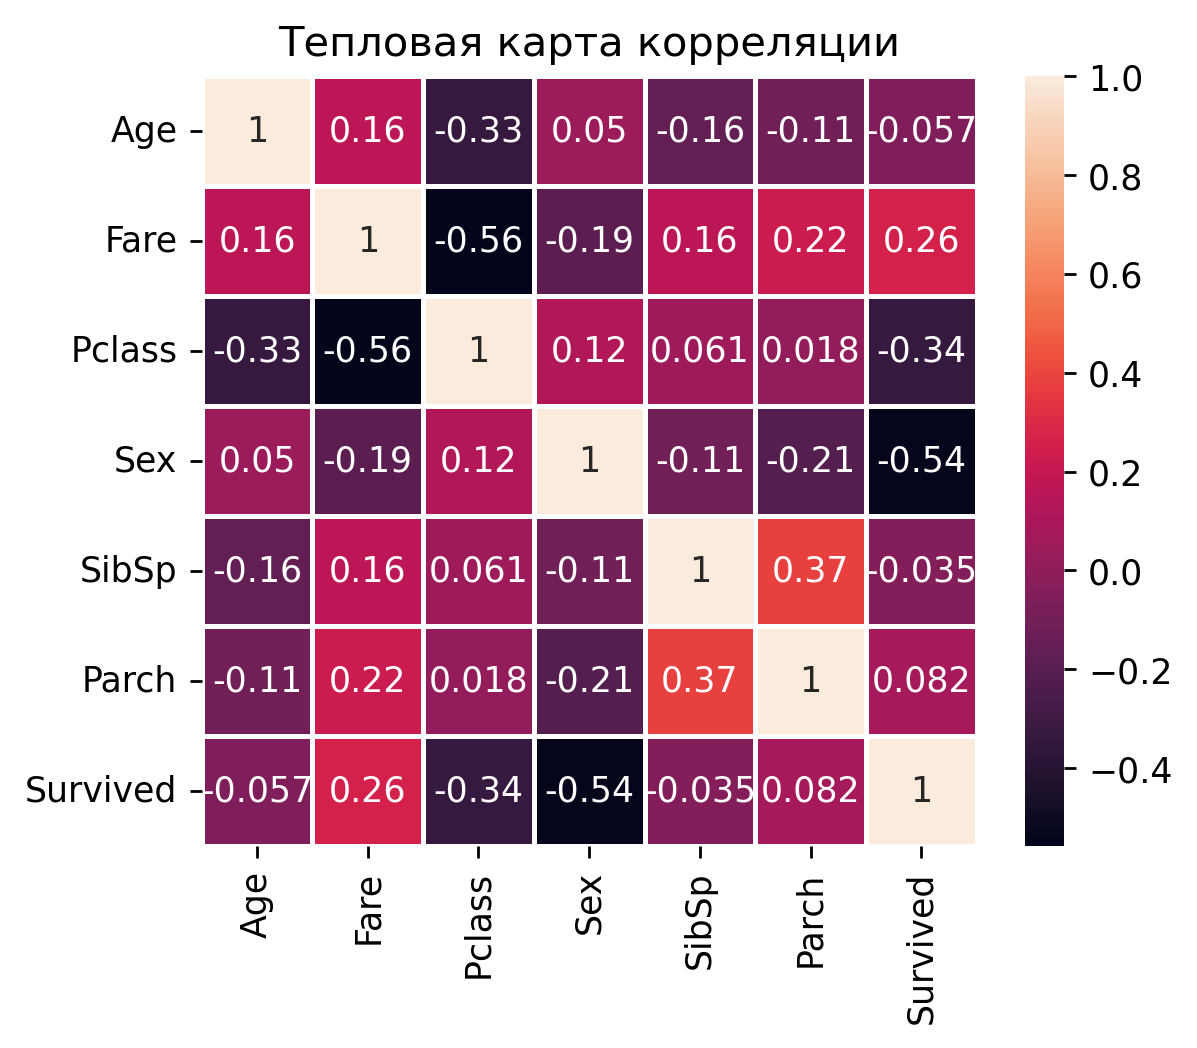

In [165]:
fig = plt.figure(figsize=(5, 4), dpi=250)
plt.title("Тепловая карта корреляции")
sns.heatmap(df_num_columns.corr(), annot=True, linewidths=1)
#Видно, что корреляция Пирсона между признаками слабая, а с целевой переменной Survived некоторые признаки имеют хорошую корреляцию

### Посмотрим на распределение  вещественных колонок Age и Fare

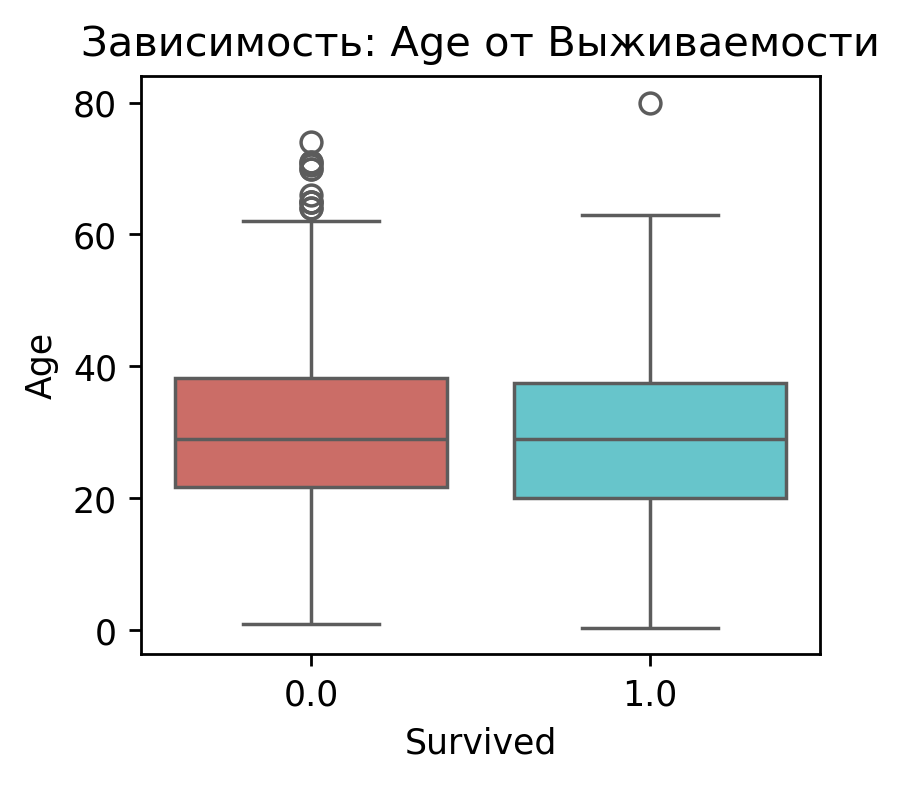

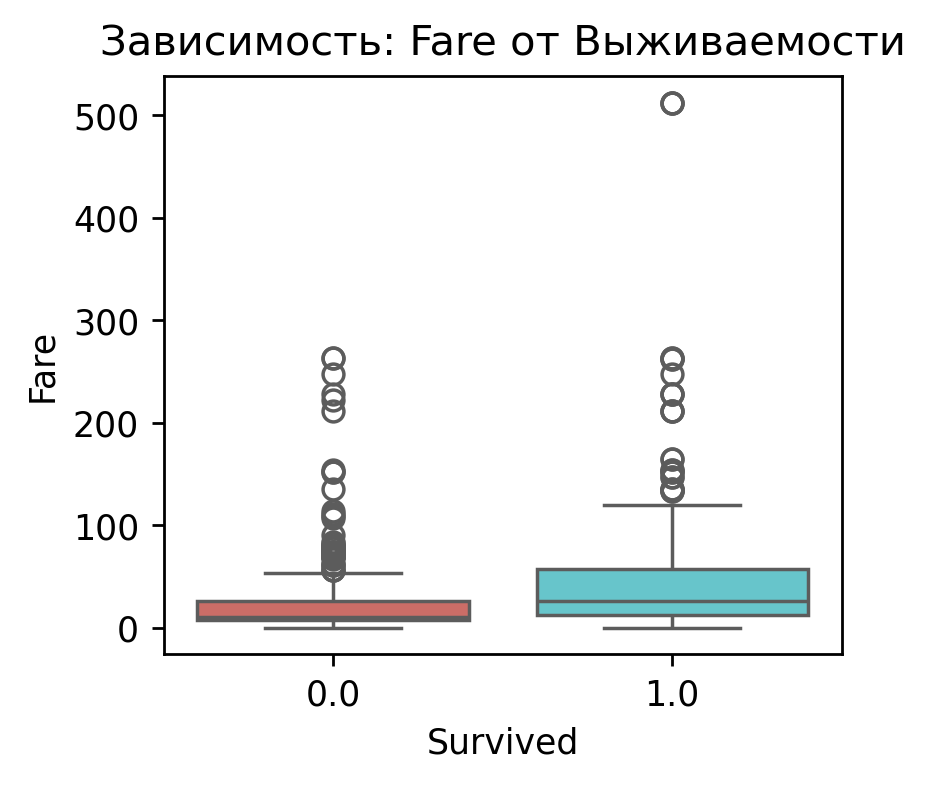

In [173]:
for col in ["Age", "Fare"]:
    fig = plt.figure(figsize=(3.5, 3), dpi=250)
    plt.title(f"Зависимость: {col} от Выживаемости")
    sns.boxplot(data=df_num_columns, y=col, palette="hls", x="Survived")
    plt.show()

### EDA анализ категориальных колонок
- Заполнение пропусков
- Просмотрел распределения категориальных признаков для target-ной переменной
- Кодирование признаков

In [176]:
df_cat_columns.drop("Survived", axis=1).describe()

,Name,Ticket,Cabin,Embarked
count,1309,1309,295,1307
unique,1307,929,186,3
top,"Connolly, Miss. Kate",CA. 2343,C23 C25 C27,S
freq,2,11,6,914


In [177]:
df_cat_columns.nunique()

Name        1307
Ticket       929
Cabin        186
Embarked       3
Survived       2
dtype: int64

In [178]:
df_cat_columns.isna().sum()

Name           0
Ticket         0
Cabin       1014
Embarked       2
Survived     418
dtype: int64

### Видно, что колонка кабины имеет много пропусков, есть гипотеза, что кабинка давалась, только людям с дорогим билетом

In [181]:
pd.concat([df_cat_columns, df_num_columns["Fare"]], axis=1).groupby(df_cat_columns["Cabin"].isnull())["Fare"].mean()
#Видно, что кабинки были только с очень дорогими билетами

Cabin
False    81.928998
True     19.146674
Name: Fare, dtype: float64

In [183]:
pd.concat([df_cat_columns, df_num_columns["Fare"]], axis=1)[["Name", "Ticket", "Cabin", "Fare"]].sample(20)

,Name,Ticket,Cabin,Fare
PassengerId,,,,
1094,"Astor, Col. John Jacob",PC 17757,C62 C64,227.5250
869,"van Melkebeke, Mr. Philemon",345777,NaN,9.5000
1107,"Head, Mr. Christopher",113038,B11,42.5000
905,"Howard, Mr. Benjamin",24065,NaN,26.0000
421,"Gheorgheff, Mr. Stanio",349254,NaN,7.8958
299,"Saalfeld, Mr. Adolphe",19988,C106,30.5000
642,"Sagesser, Mlle. Emma",PC 17477,B35,69.3000
797,"Leader, Dr. Alice (Farnham)",17465,D17,25.9292
600,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",PC 17485,A20,56.9292


In [184]:
#Удалим колонки Name, Ticket, Cabin так как они не несут смысловой информации
df_cat_columns.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [189]:
df_cat_columns.isna().sum()

Embarked      2
Survived    418
dtype: int64

In [192]:
#Заполним пропуски в колонке Embarked
df_cat_columns["Embarked"].fillna(df_cat_columns["Embarked"].value_counts().index[0], inplace=True)
df_cat_columns.isna().sum()

Embarked      0
Survived    418
dtype: int64

In [193]:
#Так как у нас всего 1 категориальные признак с 3 уникальными значениями, тогда применим ohe
df_cat_columns["Embarked"].nunique()

3

In [194]:
#Уберем колонку Survived, так как она уже есть в df_num_columns
df_cat_columns.drop("Survived", axis=1, inplace=True)

In [195]:
print(df_num_columns.columns)
print(df_cat_columns.columns)

Index(['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Survived'], dtype='object')
Index(['Embarked'], dtype='object')


In [196]:
#Кодировка ohe
ohe = pd.get_dummies(df_cat_columns["Embarked"], prefix="Embarked", dtype=int, drop_first=True)
df_cat_columns = pd.concat([df_cat_columns, ohe], axis=1)
df_cat_columns.drop("Embarked", axis=1, inplace=True)

In [200]:
full_df = pd.concat([df_num_columns, df_cat_columns], axis=1)
print(full_df.columns)

Index(['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Survived',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [288]:
full.sample(5)

,Age,Fare,Pclass,Sex,SibSp,Parch,Survived,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
718,27.0,10.5000,2,0,0,0,1.0,0,1
1132,55.0,27.7208,1,0,0,0,NaN,0,0
145,18.0,11.5000,2,1,0,0,0.0,0,1
205,18.0,8.0500,3,1,0,0,1.0,0,1
463,47.0,38.5000,1,1,0,0,0.0,0,1


In [281]:
X, X_testing = full_df.iloc[train_index].drop("Survived", axis=1), full_df.iloc[test_index].drop("Survived", axis=1)
y = full_df["Survived"].iloc[train_index]

In [292]:
X.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,22.0,7.2500,3,1,1,0,0,1
2,38.0,71.2833,1,0,1,0,0,0
3,26.0,7.9250,3,0,0,0,0,1
4,35.0,53.1000,1,0,1,0,0,1
5,35.0,8.0500,3,1,0,0,0,1


### Проведение эксперимента
- Генерация полиномиальных признаков с помощью PolynomialFeature
- Генерация полиномиальных признаков с без коомбинаци, то есть без взаимодействия признаков между собой
- Генерация только вещественных полиномиальных признаков, то есть признаков ["Age", "Fare"]

In [330]:
# 1. Генерация признаков c помощью PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

train_score_list_1, test_score_list_1, cross_val_score_list_1 = [], [], []
cv = KFold(n_splits=10, shuffle=True, random_state=42)
for degree in range(1, 10):
    transform = PolynomialFeatures(degree=degree, include_bias=False)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    X_train_poly = transform.fit_transform(X_train)
    X_test_poly = transform.transform(X_test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    print(f"Количество признаков: {X_train_scaled.shape[1]}")
    X_test_scaled = scaler.fit_transform(X_test_poly)

    model = LogisticRegression(penalty="l2")
    model.fit(X_train_scaled, y_train)

    vals_errors = []
    for train_index, test_index in cv.split(X):
        X_train_val, X_test_val, y_train_val, y_test_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        transform_val = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_val_poly = transform_val.fit_transform(X_train_val)
        X_test_val_poly = transform_val.transform(X_test_val)
        scaler = StandardScaler()
        X_train_val_scaled = scaler.fit_transform(X_train_val_poly)
        X_test_val_scaled = scaler.transform(X_test_val_poly)
        model_val = LogisticRegression()

        model_val.fit(X_train_val_scaled, y_train_val)
        vals_errors.append(float(np.mean(np.where(model_val.predict(X_test_val_scaled) == y_test_val, 1, 0))))
    cross_val_score_list_1.append(round(float(np.mean(vals_errors)), 5))

    train_score = round(int(np.sum(np.where(y_train == model.predict(X_train_scaled), 1, 0))) / len(X_train_scaled), 5)
    test_score = round(int(np.sum(np.where(y_test == model.predict(X_test_scaled), 1, 0))) / len(X_test_scaled), 5)
    cross_val_scor = round(float(cross_validate.mean()), 5)
    train_score_list_1.append(train_score)
    test_score_list_1.append(test_score)

Количество признаков: 8
Количество признаков: 44
Количество признаков: 164
Количество признаков: 494
Количество признаков: 1286
Количество признаков: 3002
Количество признаков: 6434
Количество признаков: 12869
Количество признаков: 24309


Ошибка на train: [0.80197, 0.83708, 0.85393, 0.86376, 0.86798, 0.87079, 0.8736, 0.875, 0.87781]
Ошибка на test: [0.7933, 0.7933, 0.81006, 0.78771, 0.78212, 0.78212, 0.77654, 0.76536, 0.77095]
Ошибка на val: [0.79345, 0.81705, 0.8137, 0.8081, 0.8081, 0.80024, 0.80358, 0.78898, 0.78673]


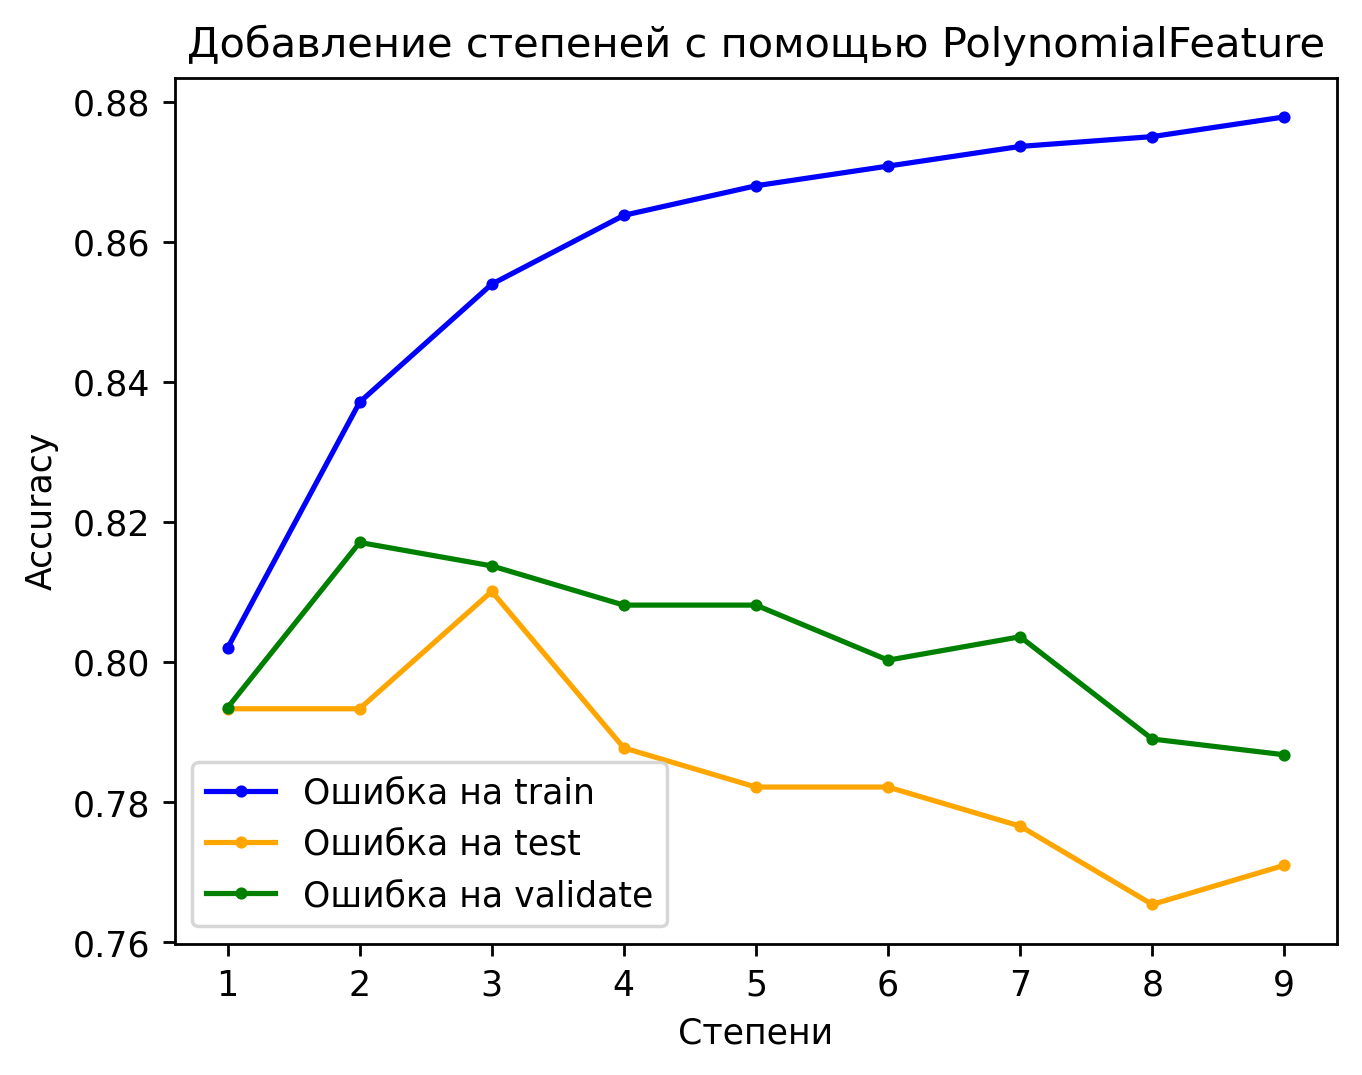

In [331]:
print(f"Ошибка на train: {train_score_list_1}", f"Ошибка на test: {test_score_list_1}", f"Ошибка на val: {cross_val_score_list_1}", sep="\n")



fig = plt.figure(figsize=(6, 4.5), dpi=250)
plt.title("Добавление степеней с помощью PolynomialFeature")
plt.plot(list(range(1,10)), train_score_list_1, color="blue", marker=".", ms=5, label="Ошибка на train")
plt.plot(list(range(1,10)), test_score_list_1, color="orange", marker=".", ms=5, label="Ошибка на test")
plt.plot(list(range(1,10)), cross_val_score_list_1, color="green", marker=".", ms=5, label="Ошибка на validate")
plt.xlabel("Степени")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [328]:
# 2. Генерация признаков c помощью генерацию только полиномиальных признаков
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

train_score_list_2, test_score_list_2, cross_val_score_list_2 = [], [], []
cv = KFold(n_splits=10, shuffle=True, random_state=42)
X_copy = X.copy()
for degree in range(1, 10):
    if degree != 1:
        for col in X.columns:
            X_copy[f"{col}_{degree}"] = X[col]**degree
    X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size = 0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    print(f"Количество признаков: {X_train_scaled.shape[1]}")

    model = LogisticRegression(penalty="l2")
    model.fit(X_train_scaled, y_train)
    vals_errors = []
    for train_index, test_index in cv.split(X_copy):
        X_train_val, X_test_val, y_train_val, y_test_val = X_copy.iloc[train_index], X_copy.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        scaler = StandardScaler()
        X_train_val_scaled = scaler.fit_transform(X_train_val)
        X_test_val_scaled = scaler.transform(X_test_val)
        model_val = LogisticRegression()

        model_val.fit(X_train_val_scaled, y_train_val)
        vals_errors.append(float(np.mean(np.where(model_val.predict(X_test_val_scaled) == y_test_val, 1, 0))))
    cross_val_score_list_2.append(round(float(np.mean(vals_errors)), 5))

    train_score = round(int(np.sum(np.where(y_train == model.predict(X_train_scaled), 1, 0))) / len(X_train_scaled), 5)
    test_score = round(int(np.sum(np.where(y_test == model.predict(X_test_scaled), 1, 0))) / len(X_test_scaled), 5)
    cross_val_scor = round(float(cross_validate.mean()), 3)
    train_score_list_2.append(train_score)
    test_score_list_2.append(test_score)

Количество признаков: 8
Количество признаков: 16
Количество признаков: 24
Количество признаков: 32
Количество признаков: 40
Количество признаков: 48
Количество признаков: 56
Количество признаков: 64
Количество признаков: 72


Ошибка на train: [0.80197, 0.80618, 0.80899, 0.80899, 0.8118, 0.80899, 0.8118, 0.81039, 0.80899]
Ошибка на test: [0.7933, 0.79888, 0.80447, 0.80447, 0.80447, 0.81006, 0.81006, 0.79888, 0.79888]
Ошибка на val: [0.79345, 0.80243, 0.80131, 0.80581, 0.80581, 0.80468, 0.80581, 0.80581, 0.80356]


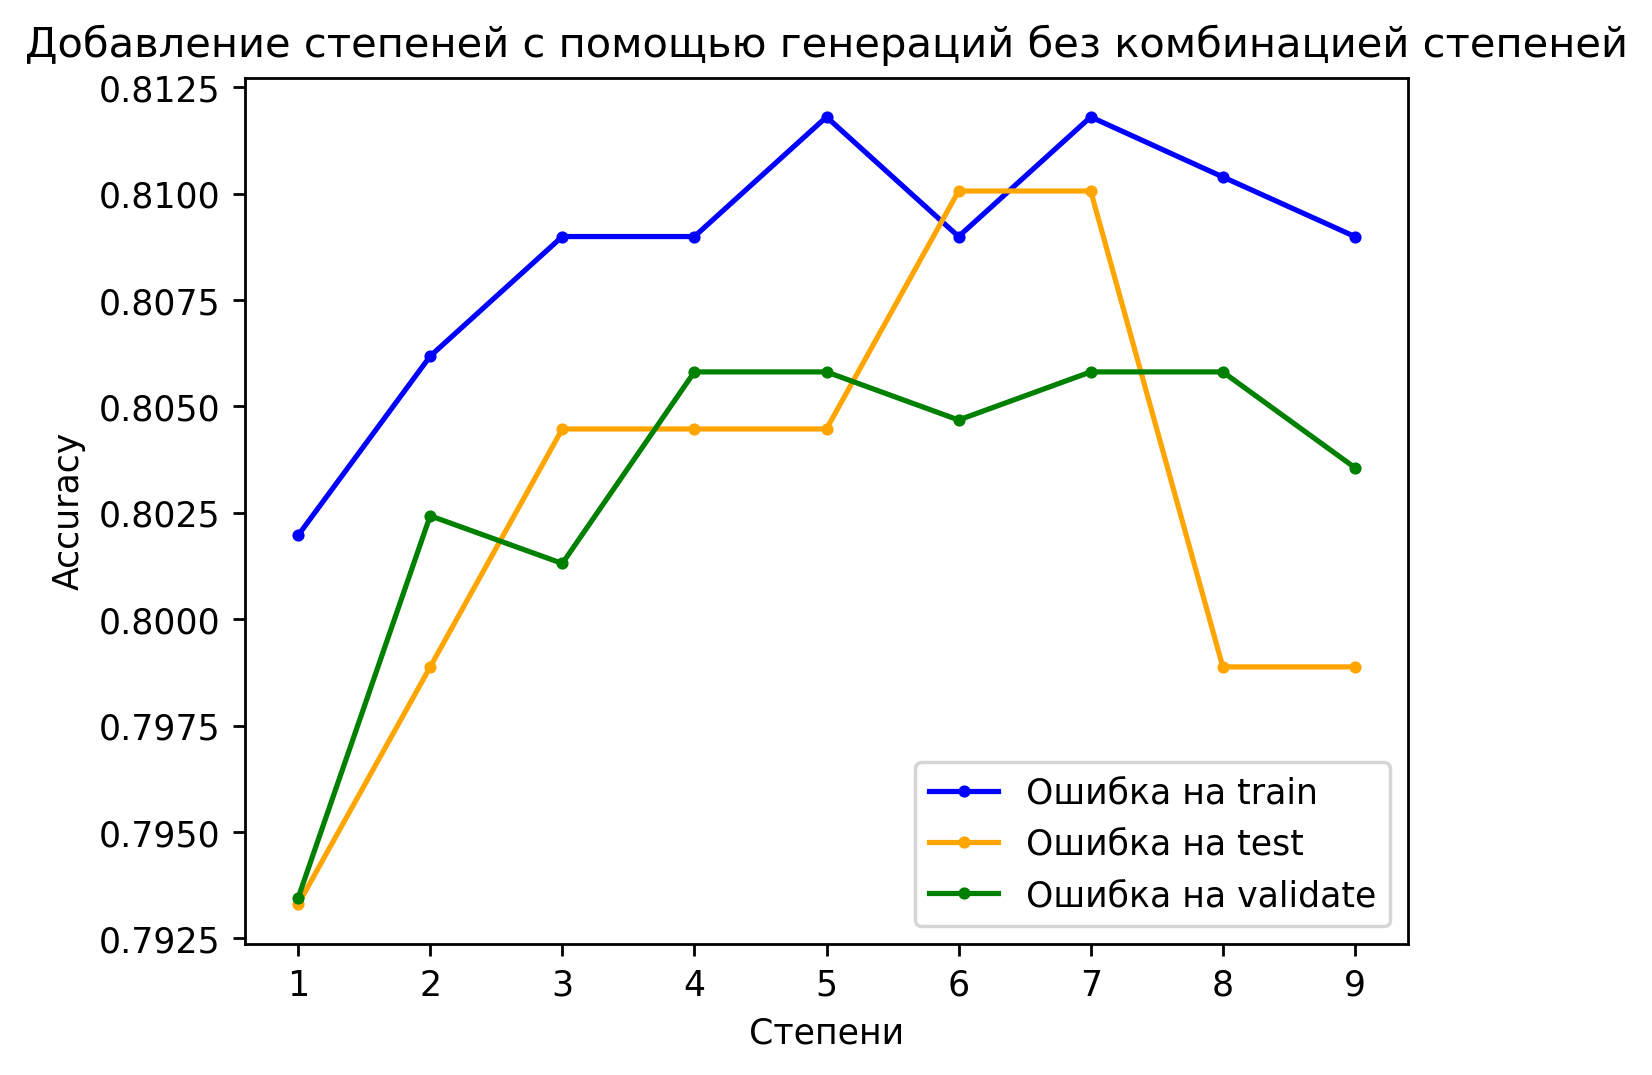

In [329]:
print(f"Ошибка на train: {train_score_list_2}", f"Ошибка на test: {test_score_list_2}", f"Ошибка на val: {cross_val_score_list_2}", sep="\n")



fig = plt.figure(figsize=(6, 4.5), dpi=250)
plt.title("Добавление степеней с помощью генераций без комбинацией степеней")
plt.plot(list(range(1,10)), train_score_list_2, color="blue", marker=".", ms=5, label="Ошибка на train")
plt.plot(list(range(1,10)), test_score_list_2, color="orange", marker=".", ms=5, label="Ошибка на test")
plt.plot(list(range(1,10)), cross_val_score_list_2, color="green", marker=".", ms=5, label="Ошибка на validate")
plt.xlabel("Степени")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [326]:
# 3. Генерация признаков c помощью генерацию только полиномиальных (вещественных) признаков 
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

train_score_list_3, test_score_list_3, cross_val_score_list_3 = [], [], []
cv = KFold(n_splits=10, shuffle=True, random_state=42)
X_copy = X.copy()
for degree in range(1, 10):
    if degree != 1:
        for col in ["Age", "Fare"]:
            X_copy[f"{col}_{degree}"] = X[col]**degree
    X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size = 0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    print(f"Количество признаков: {X_train_scaled.shape[1]}")

    model = LogisticRegression(penalty="l2")
    model.fit(X_train_scaled, y_train)
    vals_errors = []
    for train_index, test_index in cv.split(X_copy):
        X_train_val, X_test_val, y_train_val, y_test_val = X_copy.iloc[train_index], X_copy.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        scaler = StandardScaler()
        X_train_val_scaled = scaler.fit_transform(X_train_val)
        X_test_val_scaled = scaler.transform(X_test_val)
        model_val = LogisticRegression()

        model_val.fit(X_train_val_scaled, y_train_val)
        vals_errors.append(float(np.mean(np.where(model_val.predict(X_test_val_scaled) == y_test_val, 1, 0))))
    cross_val_score_list_3.append(round(float(np.mean(vals_errors)), 5))

    train_score = round(int(np.sum(np.where(y_train == model.predict(X_train_scaled), 1, 0))) / len(X_train_scaled), 5)
    test_score = round(int(np.sum(np.where(y_test == model.predict(X_test_scaled), 1, 0))) / len(X_test_scaled), 5)
    cross_val_scor = round(float(cross_validate.mean()), 3)
    train_score_list_3.append(train_score)
    test_score_list_3.append(test_score)

Количество признаков: 8
Количество признаков: 10
Количество признаков: 12
Количество признаков: 14
Количество признаков: 16
Количество признаков: 18
Количество признаков: 20
Количество признаков: 22
Количество признаков: 24


Ошибка на train: [0.80197, 0.80197, 0.80618, 0.80899, 0.80758, 0.80899, 0.80758, 0.80618, 0.80478]
Ошибка на test: [0.7933, 0.7933, 0.7933, 0.7933, 0.7933, 0.7933, 0.79888, 0.78771, 0.78771]
Ошибка на val: [0.79345, 0.79343, 0.79345, 0.79794, 0.79682, 0.79682, 0.79794, 0.79794, 0.79682]


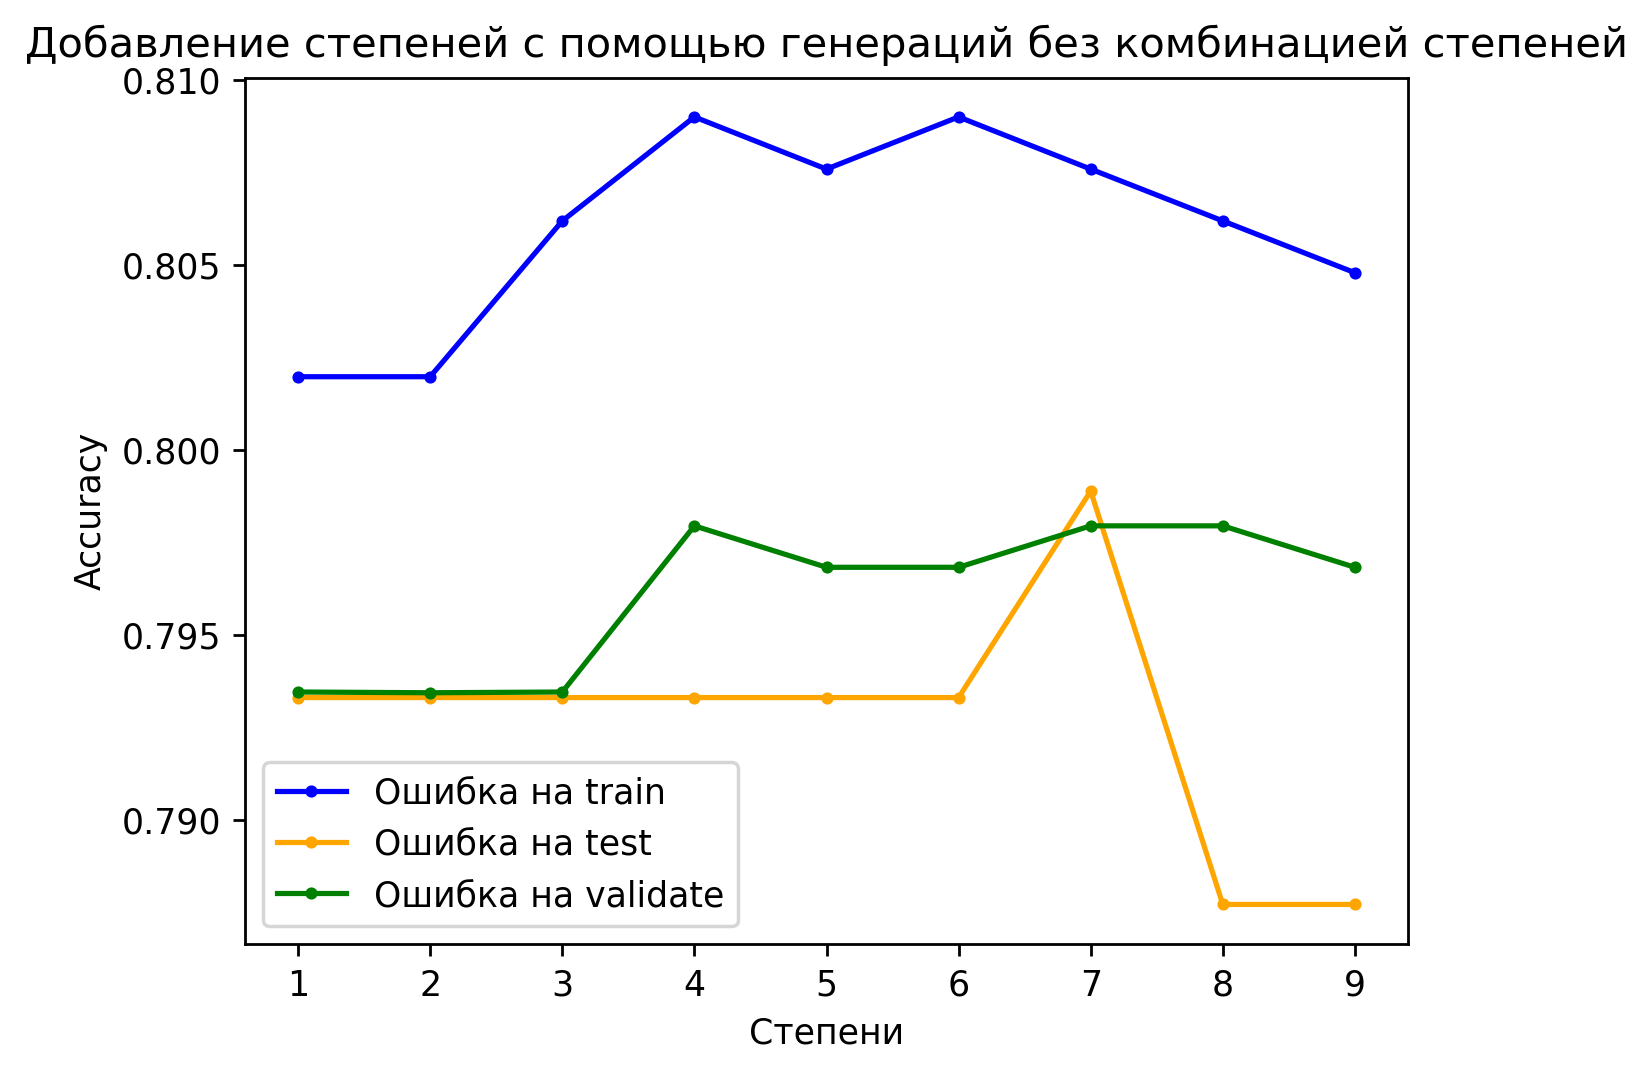

In [327]:
print(f"Ошибка на train: {train_score_list_3}", f"Ошибка на test: {test_score_list_3}", f"Ошибка на val: {cross_val_score_list_3}", sep="\n")



fig = plt.figure(figsize=(6, 4.5), dpi=250)
plt.title("Добавление степеней с помощью генераций без комбинацией степеней")
plt.plot(list(range(1,10)), train_score_list_3, color="blue", marker=".", ms=5, label="Ошибка на train")
plt.plot(list(range(1,10)), test_score_list_3, color="orange", marker=".", ms=5, label="Ошибка на test")
plt.plot(list(range(1,10)), cross_val_score_list_3, color="green", marker=".", ms=5, label="Ошибка на validate")
plt.xlabel("Степени")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [336]:
errors_dict = {"train_score_list_1": train_score_list_1,
              "test_score_list_1": test_score_list_1,
              "cross_val_score_list_1": cross_val_score_list_1,
              "train_score_list_2": train_score_list_2,
              "test_score_list_2": test_score_list_2,
              "cross_val_score_list_2": cross_val_score_list_2,
              "train_score_list_3": train_score_list_3,
              "test_score_list_3": test_score_list_3,
              "cross_val_score_list_3": cross_val_score_list_3}
dr_error = pd.DataFrame(index=list(range(1, 10)), data=errors_dict)
dr_error

,train_score_list_1,test_score_list_1,cross_val_score_list_1,train_score_list_2,test_score_list_2,cross_val_score_list_2,train_score_list_3,test_score_list_3,cross_val_score_list_3
1,0.80197,0.79330,0.79345,0.80197,0.79330,0.79345,0.80197,0.79330,0.79345
2,0.83708,0.79330,0.81705,0.80618,0.79888,0.80243,0.80197,0.79330,0.79343
3,0.85393,0.81006,0.81370,0.80899,0.80447,0.80131,0.80618,0.79330,0.79345
4,0.86376,0.78771,0.80810,0.80899,0.80447,0.80581,0.80899,0.79330,0.79794
5,0.86798,0.78212,0.80810,0.81180,0.80447,0.80581,0.80758,0.79330,0.79682
6,0.87079,0.78212,0.80024,0.80899,0.81006,0.80468,0.80899,0.79330,0.79682
7,0.87360,0.77654,0.80358,0.81180,0.81006,0.80581,0.80758,0.79888,0.79794
8,0.87500,0.76536,0.78898,0.81039,0.79888,0.80581,0.80618,0.78771,0.79794
9,0.87781,0.77095,0.78673,0.80899,0.79888,0.80356,0.80478,0.78771,0.79682


### Результаты тестирования
Тестирование показало, что лучший результат достигается при второй степени с помощью PolynomialFeature

### Напишем свой класс для LogisticRegression

In [371]:
class LogisticRegressionCustom:
    def __init__(self, bias=True, learning_rate=0.01, max_iter=1000, threahold=0.5):
        self.bias = bias
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.threahold = threahold
        self.W = None
        self.b = 0

    def fit(self, X, y):
        self.n_rows, self.n_cols = X.shape
        self.W = np.zeros(self.n_cols)

        for iteration in range(self.max_iter):
            z = np.dot(X, self.W) + self.b
            a = 1 / (1 + np.exp(-z))

            dW = (1 / self.n_rows) * np.dot((a - y), X)
            db = (1 / self.n_rows) * np.sum(a - y)

            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db

    def predict_proba(self, X):
        z = np.dot(X, self.W) + self.b
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        predict_proba = self.predict_proba(X)
        return np.where(predict_proba > self.threahold, 1, 0)

In [447]:
X, X_testing = full_df.iloc[train_index].drop("Survived", axis=1), full_df.iloc[test_index].drop("Survived", axis=1)
y = full_df["Survived"].iloc[train_index]

In [448]:
#Тестирование sklearn LogisticRegression
train_error_list_sklearn, test_error_list_sklearn = [], []
cv = KFold(n_splits=25, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = transformer.fit_transform(X_train)
    X_test_poly = transformer.transform(X_test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.fit_transform(X_test_poly)

    sklearn_model = LogisticRegression()

    sklearn_model.fit(X_train_scaled, y_train)
    
    train_error_list_sklearn.append(float(np.mean(np.where(sklearn_model.predict(X_train_scaled) == y_train, 1, 0))))
    test_error_list_sklearn.append(float(np.mean(np.where(sklearn_model.predict(X_test_scaled) == y_test, 1, 0))))

In [449]:
print(f"Результат на train: {round(float(np.mean(train_error_list_sklearn)), 5)}")
print(f"Результат на test: {round(float(np.mean(test_error_list_sklearn)), 5)}")

Результат на train: 0.83222
Результат на test: 0.80428


In [372]:
#Тестирование sklearn LogisticRegression
train_error_list_custom, test_error_list_custom = [], []
cv = KFold(n_splits=25, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = transformer.fit_transform(X_train)
    X_test_poly = transformer.transform(X_test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.fit_transform(X_test_poly)
    #Подбираем различные max_iter = {1000, 2000, 3000, 4000, 5000}
    custom_model = LogisticRegressionCustom(max_iter=5000)

    custom_model.fit(X_train_scaled, y_train)
    
    train_error_list_custom.append(float(np.mean(np.where(custom_model.predict(X_train_scaled) == y_train, 1, 0))))
    test_error_list_custom.append(float(np.mean(np.where(custom_model.predict(X_test_scaled) == y_test, 1, 0))))

In [365]:
#Для 1000 итераций
print(f"Результат на train: {round(float(np.mean(train_error_list_custom)), 5)}")
print(f"Результат на test: {round(float(np.mean(test_error_list_custom)), 5)}")

Результат на train: 0.83104
Результат на test: 0.81029


In [354]:
#Для 2000 итераций
print(f"Результат на train: {round(float(np.mean(train_error_list_custom)), 5)}")
print(f"Результат на test: {round(float(np.mean(test_error_list_custom)), 5)}")

Результат на train: 0.81865
Результат на test: 0.8114


In [356]:
#Для 3000 итераций
print(f"Результат на train: {round(float(np.mean(train_error_list_custom)), 5)}")
print(f"Результат на test: {round(float(np.mean(test_error_list_custom)), 5)}")

Результат на train: 0.82491
Результат на test: 0.81476


In [358]:
#Для 4000 итераций
print(f"Результат на train: {round(float(np.mean(train_error_list_custom)), 5)}")
print(f"Результат на test: {round(float(np.mean(test_error_list_custom)), 5)}")

Результат на train: 0.8295
Результат на test: 0.81365


In [373]:
#Для 5000 итераций
print(f"Результат на train: {round(float(np.mean(train_error_list_custom)), 5)}")
print(f"Результат на test: {round(float(np.mean(test_error_list_custom)), 5)}")

Результат на train: 0.83104
Результат на test: 0.81029


In [374]:
#Сравление весов модели
print(sklearn_model.coef_)
print(custom_model.W)

[[-0.14326294 -0.45083359 -1.16208407 -0.78598252  0.67067033  1.24959162
   0.01856234  0.08083741  0.38109418  0.10431903 -0.36048333 -0.64850993
   0.40173673 -0.77363828  0.31964628  0.15669693  0.47640298  0.59464357
  -0.26054834 -0.03320211 -0.68447648 -0.28365111 -0.03158337  0.22364002
   1.06592437 -0.98090415 -0.4945077   0.05567242 -0.38019888 -0.78598252
   0.02789678  0.27669254 -0.40622918 -0.15579792 -0.12677406 -0.00375922
   0.37513547 -0.54815064  0.04059443 -1.03954753  0.01930248  0.01856234
   0.          0.08083741]]
[-0.06774902  0.13234096 -0.29235174 -0.43201683  0.00261794  0.23434502
 -0.00108583  0.00891891  0.18631208  0.14388399 -0.24614314 -0.5784906
  0.16640884 -0.36170133  0.1672142   0.0292821   0.17090121  0.25879525
 -0.38591444 -0.03920235 -0.29502111 -0.07340267  0.0523654  -0.29434016
  0.14703041 -0.25946575  0.02420346  0.0165245  -0.25662325 -0.43201683
  0.11568104  0.31469956 -0.25312359 -0.06154246 -0.17681201 -0.15587019
  0.08755408 -0.2

### Видно, что класс LogisticRegressionCustom работает корректно, значение практически приближается к sklearn модели
#### следующие действия:
- Добавление регуляризации 

In [383]:
class LogisticRegressionCustom_1:
    def __init__(self, bias=True, learning_rate=0.01, max_iter=1000, verbose=1000, threahold=0.5, penalty=None, alpha=1, l1_ratio=0.5):
        self.bias = bias
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.verbose = verbose
        self.threahold = threahold
        self.penalty = penalty
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.W = None
        self.b = 0

    def fit(self, X, y):
        self.n_rows, self.n_cols = X.shape
        self.W = np.zeros(self.n_cols)

        for iteration in range(self.max_iter):
            z = np.dot(X, self.W) + self.b
            a = 1 / (1 + np.exp(-z))

            if self.penalty == "l1":
                dW = (1 / self.n_rows) * (np.dot((a - y), X) + np.sign(self.W))
                db = (1 / self.n_rows) * np.sum(a - y)
            elif self.penalty == "l2":
                dW = (1 / self.n_rows) * (np.dot((a - y), X) + 2 * self.W)
                db = (1 / self.n_rows) * np.sum(a - y)
            elif self.penalty == "elasticnet":
                grad_w1 = ((1 - self.l1_ratio) / self.n_rows) * (np.dot((a - y), X) + np.sign(self.W))
                grad_w2 = (self.l1_ratio / self.n_rows) * (np.dot((a - y), X) + 2 * self.W)
                dW = grad_w1 + grad_w2
                db = (1 / self.n_rows) * np.sum(a - y)
            else:
                dW = (1 / self.n_rows) * np.dot((a - y), X)
                db = (1 / self.n_rows) * np.sum(a - y)

            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db

    def predict_proba(self, X):
        z = np.dot(X, self.W) + self.b
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        predict_proba = self.predict_proba(X)
        return np.where(predict_proba > self.threahold, 1, 0)

In [386]:
#Тестирование sklearn LogisticRegression
train_error_list_custom, test_error_list_custom = [], []
cv = KFold(n_splits=25, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = transformer.fit_transform(X_train)
    X_test_poly = transformer.transform(X_test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.fit_transform(X_test_poly)
    #Подбираем различные max_iter = {1000, 2000, 3000, 4000, 5000}
    custom_model = LogisticRegressionCustom_1(max_iter=5000, penalty="l2", alpha=0.2)

    custom_model.fit(X_train_scaled, y_train)
    
    train_error_list_custom.append(float(np.mean(np.where(custom_model.predict(X_train_scaled) == y_train, 1, 0))))
    test_error_list_custom.append(float(np.mean(np.where(custom_model.predict(X_test_scaled) == y_test, 1, 0))))

In [387]:
#Для 5000 итераций
print(f"Результат на train: {round(float(np.mean(train_error_list_custom)), 5)}")
print(f"Результат на test: {round(float(np.mean(test_error_list_custom)), 5)}")

Результат на train: 0.83015
Результат на test: 0.81029


### Подборка лучших гиперпараметров

In [405]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
from sklearn.model_selection import GridSearchCV


pipe_model = Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)),
                      ("scaler", StandardScaler()),
                      ("model", LogisticRegression(n_jobs=-1))])
param_grid = {"model__penalty": ["l1", "l2", "elasticnet"],
             "model__C": [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20, 50, 100],
             "model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}
grid = GridSearchCV(estimator=pipe_model, param_grid=param_grid, cv=cv, scoring="accuracy")
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(n_jobs=-1))]),
             param_grid={'model__C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 20,
                                      50, 100],
                         'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [458]:
#Попытаемся найти более лучшие гаперпараметры
pipe_model = Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)),
                      ("scaler", StandardScaler()),
                      ("model", LogisticRegression(n_jobs=-1))])

param_grid = {"model__penalty": ["l1", "l2", "elasticnet"],
             "model__C": [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
             "model__l1_ratio": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]}
grid = GridSearchCV(estimator=pipe_model, param_grid=param_grid, cv=cv, scoring="accuracy")
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=25, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(n_jobs=-1))]),
             param_grid={'model__C': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                      0.85, 0.9],
                         'model__l1_ratio': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                             0.07, 0.08, 0.09],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [463]:
train_error_list_final, test_error_list_final = [], []
cv = KFold(n_splits=25, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = transformer.fit_transform(X_train)
    X_test_poly = transformer.transform(X_test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.fit_transform(X_test_poly)
    model = LogisticRegression(C=0.65, l1_ratio=0.01, n_jobs=-1)

    model.fit(X_train_scaled, y_train)
    
    train_error_list_final.append(float(np.mean(np.where(model.predict(X_train_scaled) == y_train, 1, 0))))
    test_error_list_final.append(float(np.mean(np.where(model.predict(X_test_scaled) == y_test, 1, 0))))

In [465]:
print(f"Результат на train: {round(float(np.mean(train_error_list_final)), 5)}")
print(f"Результат на test: {round(float(np.mean(test_error_list_final)), 5)}")

Результат на train: 0.83131
Результат на test: 0.80792


In [466]:
#Итоговое предсказание
X, X_testing = full_df.iloc[train_index].drop("Survived", axis=1), full_df.iloc[test_index].drop("Survived", axis=1)
y = full_df["Survived"].iloc[train_index]

X_testing_poly = transformer.transform(X_testing)
X_testing_scaled = scaler.transform(X_testing_poly)
model.predict(X_testing_scaled)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.])